# Lab 4

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

import matplotlib.pyplot as plt
import matplotlib


#
# TODO: Parameters to play around with
PLOT_TYPE_TEXT = False    # If you'd like to see indices
PLOT_VECTORS = True       # If you'd like to see your original features in P.C.-Space


matplotlib.style.use('ggplot') # Look Pretty
c = ['red', 'green', 'blue', 'orange', 'yellow', 'brown']



//anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
def drawVectors(transformed_features, components_, columns, plt):
  num_columns = len(columns)

  # This function will project your *original* feature (columns)
  # onto your principal component feature-space, so that you can
  # visualize how "important" each one was in the
  # multi-dimensional scaling
  
  # Scale the principal components by the max value in
  # the transformed set belonging to that component
  xvector = components_[0] * max(transformed_features[:,0])
  yvector = components_[1] * max(transformed_features[:,1])

  ## Visualize projections

  # Sort each column by its length. These are your *original*
  # columns, not the principal components.
  import math
  important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns-1) }
  important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
  print "Projected Features by importance:\n", important_features

  ax = plt.axes()

  for i in range(num_columns-1):
    # Use an arrow to project each original feature as a
    # labeled vector on your principal component axes
    plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75, zorder=600000)
    plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75, zorder=600000)
  return ax
    


In [4]:

def doPCA(data, dimensions=2):
  from sklearn.decomposition import RandomizedPCA
  model = RandomizedPCA(n_components=dimensions)
  model.fit(data)
  return model



In [5]:
from sklearn.cluster import KMeans


def doKMeans(data, clusters=0):
  #
  # TODO: Do the KMeans clustering here, passing in the # of clusters parameter
  # and fit it against your data. Then, return a tuple containing the cluster
  # centers and the labels
  #
  # .. your code here ..
  model = KMeans(n_clusters=clusters).fit(data)
  return model.cluster_centers_, model.labels_



In [6]:

#
# TODO: Load up the dataset. It has may or may not have nans in it. Make
# sure you catch them and destroy them, by setting them to '0'. This is valid
# for this dataset, since if the value is missing, you can assume no $ was spent
# on it.
#
# .. your code here ..

df = pd.read_csv('Datasets/Wholesale customers data.csv')
df = df.fillna(0)

In [7]:
print(df.describe())
print('\n')
print(df.head(5))

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

In [8]:
#
# TODO: As instructed, get rid of the 'Channel' and 'Region' columns, since
# you'll be investigating as if this were a single location wholesaler, rather
# than a national / international one. Leaving these fields in here would cause
# KMeans to examine and give weight to them.
#
# .. your code here ..
df = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

print(df.describe())
print('\n')
print(df.head(5))

               Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper    Delicassen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000  


   Fresh  Milk  Grocery  Frozen  Detergents

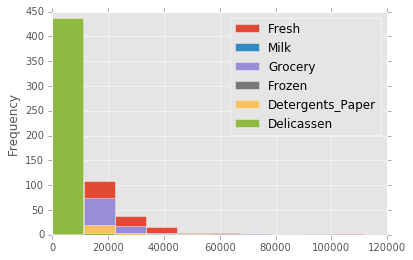

In [9]:
#
# TODO: Before unitizing / standardizing / normalizing your data in preparation for
# K-Means, it's a good idea to get a quick peek at it. You can do this using the
# .describe() method, or even by using the built-in pandas df.plot.hist()
#
# .. your code here ..
df.plot.hist()
plt.show()

In [10]:
#
# INFO: Having checked out your data, you may have noticed there's a pretty big gap
# between the top customers in each feature category and the rest. Some feature
# scaling algos won't get rid of outliers for you, so it's a good idea to handle that
# manually---particularly if your goal is NOT to determine the top customers. After
# all, you can do that with a simple Pandas .sort_values() and not a machine
# learning clustering algorithm. From a business perspective, you're probably more
# interested in clustering your +/- 2 standard deviation customers, rather than the
# creme dela creme, or bottom of the barrel'ers
#
# Remove top 5 and bottom 5 samples for each column:
drop = {}
for col in df.columns:
  # Bottom 5
  sort = df.sort_values(by=col, ascending=True)
  if len(sort) > 5: sort=sort[:5]
  for index in sort.index: drop[index] = True # Just store the index once

  # Top 5
  sort = df.sort_values(by=col, ascending=False)
  if len(sort) > 5: sort=sort[:5]
  for index in sort.index: drop[index] = True # Just store the index once



In [11]:
#
# INFO Drop rows by index. We do this all at once in case there is a
# collision. This way, we don't end up dropping more rows than we have
# to, if there is a single row that satisfies the drop for multiple columns.
# Since there are 6 rows, if we end up dropping < 5*6*2 = 60 rows, that means
# there indeed were collisions.
print "Dropping {0} Outliers...".format(len(drop))
df.drop(inplace=True, labels=drop.keys(), axis=0)
print df.describe()




Dropping 42 Outliers...
              Fresh          Milk       Grocery        Frozen  \
count    398.000000    398.000000    398.000000    398.000000   
mean   10996.231156   5144.090452   7091.711055   2639.721106   
std     9933.042596   5057.406574   6923.019293   2974.246906   
min       37.000000    258.000000    314.000000     47.000000   
25%     3324.500000   1571.250000   2155.500000    749.750000   
50%     8257.500000   3607.500000   4573.000000   1526.000000   
75%    15828.500000   6953.250000   9922.250000   3370.250000   
max    53205.000000  29892.000000  39694.000000  17866.000000   

       Detergents_Paper   Delicassen  
count        398.000000   398.000000  
mean        2562.974874  1278.736181  
std         3608.176776  1220.745297  
min           10.000000    11.000000  
25%          273.250000   409.500000  
50%          812.000000   946.500000  
75%         3841.500000  1752.250000  
max        19410.000000  7844.000000  


In [12]:
#
# INFO: What are you interested in?
#
# Depending on what you're interested in, you might take a different approach
# to normalizing/standardizing your data.
# 
# You should note that all columns left in the dataset are of the same unit.
# You might ask yourself, do I even need to normalize / standardize the data?
# The answer depends on what you're trying to accomplish. For instance, although
# all the units are the same (generic money unit), the price per item in your
# store isn't. There may be some cheap items and some expensive one. If your goal
# is to find out what items people buy tend to buy together but you didn't 
# unitize properly before running kMeans, the contribution of the lesser priced
# item would be dwarfed by the more expensive item.
#
# For a great overview on a few of the normalization methods supported in SKLearn,
# please check out: https://stackoverflow.com/questions/30918781/right-function-for-normalizing-input-of-sklearn-svm
#
# Suffice to say, at the end of the day, you're going to have to know what question
# you want answered and what data you have available in order to select the best
# method for your purpose. Luckily, SKLearn's interfaces are easy to switch out
# so in the mean time, you can experiment with all of them and see how they alter
# your results.
#
#
# 5-sec summary before you dive deeper online:
#
# NORMALIZATION: Let's say your user spend a LOT. Normalization divides each item by
#                the average overall amount of spending. Stated differently, your
#                new feature is = the contribution of overall spending going into
#                that particular item: $spent on feature / $overall spent by sample
#
# MINMAX:        What % in the overall range of $spent by all users on THIS particular
#                feature is the current sample's feature at? When you're dealing with
#                all the same units, this will produce a near face-value amount. Be
#                careful though: if you have even a single outlier, it can cause all
#                your data to get squashed up in lower percentages.
#                Imagine your buyers usually spend $100 on wholesale milk, but today
#                only spent $20. This is the relationship you're trying to capture 
#                with MinMax. NOTE: MinMax doesn't standardize (std. dev.); it only
#                normalizes / unitizes your feature, in the mathematical sense.
#                MinMax can be used as an alternative to zero mean, unit variance scaling.
#                [(sampleFeatureValue-min) / (max-min)] * (max-min) + min
#                Where min and max are for the overall feature values for all samples.


#
# TODO: Un-comment just ***ONE*** of lines at a time and see how alters your results
# Pay attention to the direction of the arrows, as well as their LENGTHS
#T = preprocessing.StandardScaler().fit_transform(df)
#T = preprocessing.MinMaxScaler().fit_transform(df)
#T = preprocessing.MaxAbsScaler().fit_transform(df)
T = preprocessing.Normalizer().fit_transform(df)
#T = df # No Change




//anaconda/envs/python2/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


In [13]:
#
# INFO: Sometimes people perform PCA before doing KMeans, so that KMeans only
# operates on the most meaningful features. In our case, there are so few features
# that doing PCA ahead of time isn't really necessary, and you can do KMeans in
# feature space. But keep in mind you have the option to transform your data to
# bring down its dimensionality. If you take that route, then your Clusters will
# already be in PCA-transformed feature space, and you won't have to project them
# again for visualization.

# Do KMeans
n_clusters = 3
centroids, labels = doKMeans(T, n_clusters)


In [14]:
#
# TODO: Print out your centroids. They're currently in feature-space, which
# is good. Print them out before you transform them into PCA space for viewing
#
# .. your code here ..
print(centroids)

[[ 0.63617195  0.21000252  0.26942189  0.60422581  0.05533952  0.09448131]
 [ 0.89934474  0.18676599  0.23844018  0.1431748   0.05218875  0.07524996]
 [ 0.25954807  0.49253136  0.67887231  0.10241834  0.27279311  0.09932931]]


In [15]:
# Do PCA *after* to visualize the results. Project the centroids as well as 
# the samples into the new 2D feature space for visualization purposes.
display_pca = doPCA(T)
T = display_pca.transform(T)
CC = display_pca.transform(centroids)

//anaconda/envs/python2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


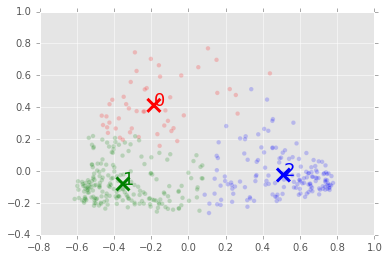

In [16]:
# Visualize all the samples. Give them the color of their cluster label
fig = plt.figure()
ax = fig.add_subplot(111)
if PLOT_TYPE_TEXT:
  # Plot the index of the sample, so you can further investigate it in your dset
  for i in range(len(T)): ax.text(T[i,0], T[i,1], df.index[i], color=c[labels[i]], alpha=0.75, zorder=600000)
  ax.set_xlim(min(T[:,0])*1.2, max(T[:,0])*1.2)
  ax.set_ylim(min(T[:,1])*1.2, max(T[:,1])*1.2)
else:
  # Plot a regular scatter plot
  sample_colors = [ c[labels[i]] for i in range(len(T)) ]
  ax.scatter(T[:, 0], T[:, 1], c=sample_colors, marker='o', alpha=0.2)

# Plot the Centroids as X's, and label them
ax.scatter(CC[:, 0], CC[:, 1], marker='x', s=169, linewidths=3, zorder=1000, c=c)
for i in range(len(centroids)): ax.text(CC[i, 0], CC[i, 1], str(i), zorder=500010, fontsize=18, color=c[i])


plt.show()


In [17]:
print(df.columns)
print('\n')
print(df.head(5))

Index([u'Fresh', u'Milk', u'Grocery', u'Frozen', u'Detergents_Paper',
       u'Delicassen'],
      dtype='object')


   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669  9656     7561     214              2674        1338
1   7057  9810     9568    1762              3293        1776
2   6353  8808     7684    2405              3516        7844
3  13265  1196     4221    6404               507        1788
4  22615  5410     7198    3915              1777        5185


In [18]:
print(display_pca.components_)

[[-0.71907205  0.34934831  0.53420381 -0.10597502  0.25190565  0.0288146 ]
 [-0.30850777  0.09152979 -0.22698035  0.90085664 -0.15778679  0.09211846]]


Projected Features by importance:
[(0.6981434470688891, 'Frozen'), (0.6075841086893125, 'Fresh'), (0.4507160910533424, 'Grocery'), (0.28069703580249655, 'Milk'), (0.23050289842768254, 'Detergents_Paper')]


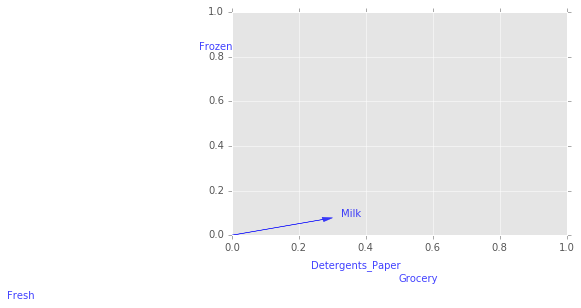

In [19]:
# Display feature vectors for investigation:
if PLOT_VECTORS: drawVectors(T, display_pca.components_, df.columns, plt)


plt.show()

In [33]:
# Add the cluster label back into the dataframe and display it:
df['label'] = pd.Series(labels, index=df.index)
print df

     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen  label
0    12669   9656     7561     214              2674        1338      2
1     7057   9810     9568    1762              3293        1776      2
2     6353   8808     7684    2405              3516        7844      2
3    13265   1196     4221    6404               507        1788      2
4    22615   5410     7198    3915              1777        5185      1
5     9413   8259     5126     666              1795        1451      2
6    12126   3199     6975     480              3140         545      2
7     7579   4956     9426    1669              3321        2566      2
8     5963   3648     6192     425              1716         750      2
9     6006  11093    18881    1159              7425        2098      0
10    3366   5403    12974    4400              5977        1744      0
11   13146   1124     4523    1420               549         497      2
12   31714  12319    11757     287              3881        2931

#### 